<a href="https://colab.research.google.com/github/cookieeyoung/Tableau-pj_team9/blob/main/total_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [20]:
df = pd.read_csv('/content/total_sales.csv')
df['거래날짜'] = pd.to_datetime(df['거래날짜'])
df.head(10)

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,쿠폰코드,할인율,할인금액,매출,수익,총 매출
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.5,Used,남,Chicago,12,ELEC10,10.0,15.371,153.71,138.339,160.21
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.5,Used,남,Chicago,12,OFF10,10.0,0.205,2.05,1.845,8.55
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.5,Not Used,남,Chicago,12,SALE10,10.0,0.000,87.65,87.650,94.15
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,0.0,Used,남,Chicago,12,AIO10,10.0,1.650,16.50,14.850,16.50
5,USER_1358,Transaction_0003,2019-01-01,Product_0854,Bags,15,5.15,0.0,Used,남,Chicago,12,AIO10,10.0,7.725,77.25,69.525,77.25
6,USER_1358,Transaction_0003,2019-01-01,Product_0880,Drinkware,15,3.08,0.0,Not Used,남,Chicago,12,EXTRA10,10.0,0.000,46.20,46.200,46.20
7,USER_1358,Transaction_0003,2019-01-01,Product_0885,Drinkware,15,10.31,0.0,Clicked,남,Chicago,12,EXTRA10,10.0,0.000,154.65,154.650,154.65
8,USER_1358,Transaction_0003,2019-01-01,Product_0898,Drinkware,5,9.27,0.0,Used,남,Chicago,12,EXTRA10,10.0,4.635,46.35,41.715,46.35
9,USER_1358,Transaction_0013,2019-01-01,Product_0973,Lifestyle,1,1.24,6.5,Used,남,Chicago,12,EXTRA10,10.0,0.124,1.24,1.116,7.74


In [13]:
# 데이터의 마지막날 +1일을 기준으로 잡음
# last = df['거래날짜'].max() + pd.DateOffset(days=1)

# rfm_df = df.groupby(['고객ID']).agg({
#     '거래날짜': lambda x: (last - x.max()).days,
#     '거래ID': lambda x: x.nunique(),
#     '총 매출': 'sum'
#     })

# rfm_df.rename(columns={'거래날짜': 'Recency',
#                         '거래ID': 'Frequency',
#                         '총 매출': 'Monetary'
#                        }, inplace=True)

# rfm_df.reset_index(inplace=True)

# rfm_df.head(5)

,고객ID,Recency,Frequency,Monetary
0,USER_0000,108,1,30.99
1,USER_0001,60,31,14121.36
2,USER_0002,74,8,1511.19
3,USER_0003,18,11,1429.47
4,USER_0004,108,13,1590.96


In [12]:
df[df['고객ID'] == 'USER_0001']['거래ID'].nunique()

31

In [17]:
# 데이터의 마지막날 +1일을 기준으로 잡음
# last = df['거래날짜'].max() + pd.DateOffset(days=1)

# rfm_df = df.groupby(['거래ID','고객ID']).agg({
#     '거래날짜': lambda x: (last - x.max()).days,
#     '거래ID': lambda x: x.nunique(),
#     '총 매출': 'sum'
#     })

# rfm_df.rename(columns={'거래날짜': 'Recency',
#                         '거래ID': 'Frequency',
#                         '총 매출': 'Monetary'
#                        }, inplace=True)

# rfm_df.reset_index(inplace=True)

# rfm_df.head(10)

,거래ID,고객ID,Recency,Frequency,Monetary
0,Transaction_0000,USER_1358,365,1,160.21
1,Transaction_0001,USER_1358,365,1,160.21
2,Transaction_0002,USER_1358,365,1,8.55
3,Transaction_0003,USER_0190,365,1,261.99
4,Transaction_0003,USER_1358,365,1,435.10
5,Transaction_0004,USER_0190,365,1,333.54
6,Transaction_0005,USER_0190,365,1,45.26
7,Transaction_0006,USER_0190,365,1,35.32
8,Transaction_0007,USER_0190,365,1,129.27
9,Transaction_0008,USER_0190,365,1,160.21


# RFM 구현

In [23]:
# 데이터의 마지막날 +1일을 기준으로 잡음
last = df['거래날짜'].max() + pd.DateOffset(days=1)

rfm_df = df.groupby('고객ID').agg({
    '거래날짜': lambda x: (last - x.max()).days,  # Recency
    '거래ID': 'nunique',  # Frequency
    '총 매출': 'sum'  # Monetary
}).reset_index()

rfm_df.rename(columns={'거래날짜': 'Recency',
                        '거래ID': 'Frequency',
                        '총 매출': 'Monetary'
                       }, inplace=True)

rfm_df.reset_index(inplace=True)

rfm_df

,index,고객ID,Recency,Frequency,Monetary
0,0,USER_0000,108,1,30.99
1,1,USER_0001,60,31,14121.36
2,2,USER_0002,74,8,1511.19
3,3,USER_0003,18,11,1429.47
4,4,USER_0004,108,13,1590.96
...,...,...,...,...,...
1463,1463,USER_1463,271,3,550.84
1464,1464,USER_1464,88,19,2485.73
1465,1465,USER_1465,195,2,114.06
1466,1466,USER_1466,70,1,298.00


# RFM 분포 시각화

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<Axes: >

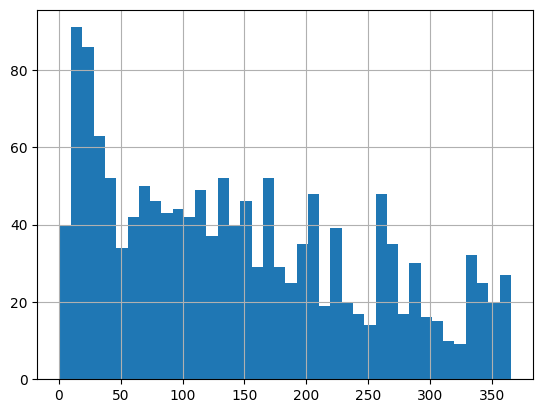

In [26]:
rfm_df['Recency'].hist(bins=40)


<Axes: >

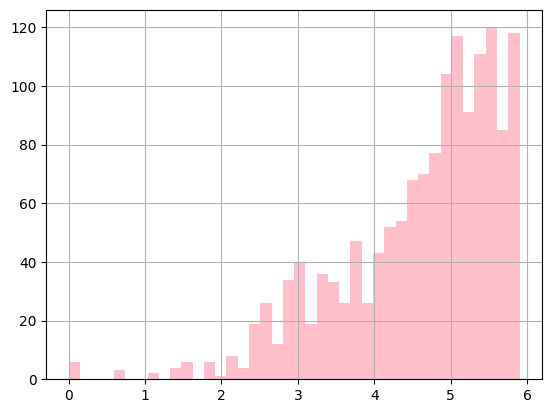

In [32]:
rfm_df['log_recency'] = np.log(rfm_df['Recency'])
rfm_df['log_recency'].hist(bins=40, color='pink')

<Axes: >

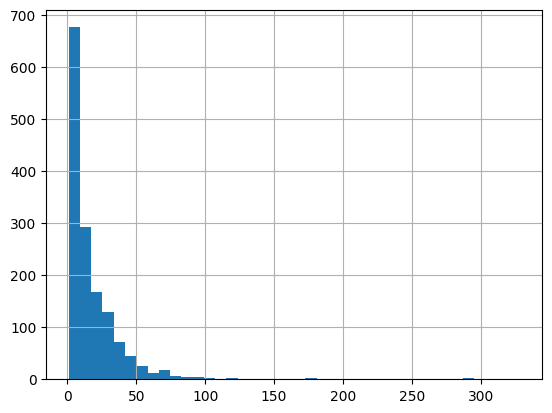

In [31]:
rfm_df['Frequency'].hist(bins=40)

<Axes: >

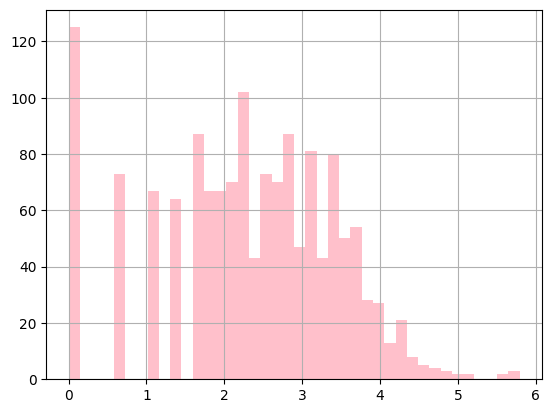

In [33]:
rfm_df['log_frequency'] = np.log(rfm_df['Frequency'])
rfm_df['log_frequency'].hist(bins=40, color='pink')

<Axes: >

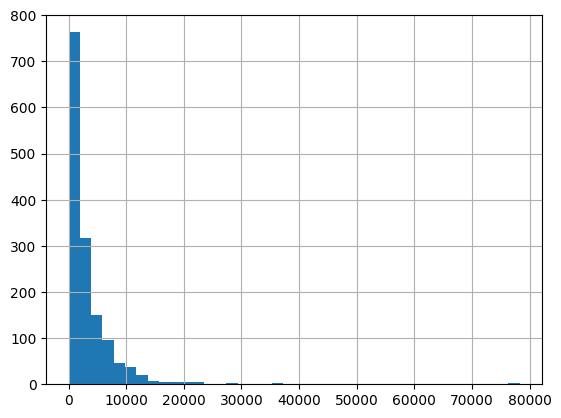

In [34]:
rfm_df['Monetary'].hist(bins=40)

<Axes: >

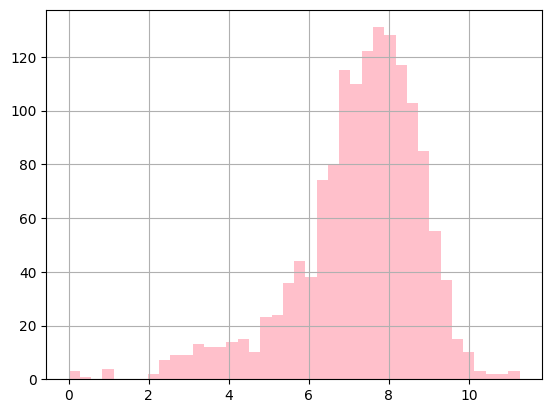

In [35]:
rfm_df['log_monetary'] = np.log(rfm_df['Monetary'])
rfm_df['log_monetary'].hist(bins=40, color='pink')

In [37]:
rfm_df.head(5)

,index,고객ID,Recency,Frequency,Monetary,log_recency,log_frequency,log_monetary
0,0,USER_0000,108,1,30.99,4.682131,0.000000,3.433665
1,1,USER_0001,60,31,14121.36,4.094345,3.433987,9.555444
2,2,USER_0002,74,8,1511.19,4.304065,2.079442,7.320653
3,3,USER_0003,18,11,1429.47,2.890372,2.397895,7.265059
4,4,USER_0004,108,13,1590.96,4.682131,2.564949,7.372093
